In [1]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.4f}'.format)

In [2]:
l_arch=os.listdir('Ecobici_2023-2024/')
l=[]
for arch in l_arch:
    aux=pd.read_csv(os.path.join('Ecobici_2023-2024/', arch))#Se crea una lista de dataframes que tenemos en la carpeta 
    l.append(aux)
df = pd.concat(l)# Juntamos los dataframe de la lista

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21790547 entries, 0 to 1829762
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
 9   Fecha Arribo           object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.8+ GB


In [4]:
df['Fecha_Arribo'] = df['Fecha_Arribo'].combine_first(df['Fecha Arribo']) #Combinamos en una columan las fechas de arribo
df.drop(columns=['Fecha Arribo'],inplace=True)

In [5]:
df.isnull().sum()

Genero_Usuario            88
Edad_Usuario             500
Bici                       0
Ciclo_Estacion_Retiro      0
Fecha_Retiro               0
Hora_Retiro                0
Ciclo_EstacionArribo       0
Fecha_Arribo               0
Hora_Arribo                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21790547 entries, 0 to 1829762
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Genero_Usuario         object 
 1   Edad_Usuario           float64
 2   Bici                   int64  
 3   Ciclo_Estacion_Retiro  object 
 4   Fecha_Retiro           object 
 5   Hora_Retiro            object 
 6   Ciclo_EstacionArribo   object 
 7   Fecha_Arribo           object 
 8   Hora_Arribo            object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.6+ GB


In [7]:
df['fecha_arribo']=df['Fecha_Arribo']+' '+df['Hora_Arribo']
#Construimos una fecha con hora

df['fecha_arribo']=pd.to_datetime(df['fecha_arribo'], format='%d/%m/%Y %H:%M:%S')
#Cambiamos el formato de esa nueva fecha a datetime

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21790547 entries, 0 to 1829762
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Genero_Usuario         object        
 1   Edad_Usuario           float64       
 2   Bici                   int64         
 3   Ciclo_Estacion_Retiro  object        
 4   Fecha_Retiro           object        
 5   Hora_Retiro            object        
 6   Ciclo_EstacionArribo   object        
 7   Fecha_Arribo           object        
 8   Hora_Arribo            object        
 9   fecha_arribo           datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [9]:
df['fecha_día_arribo']=pd.to_datetime(df['fecha_arribo'].dt.date)# Nos quedamos solo con el dia, mes y anio de la fecha

In [10]:
df.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo,fecha_arribo,fecha_día_arribo
0,M,45.0000,2578060,304,31/03/2024,23:25:50,117,01/04/2024,00:00:04,2024-04-01 00:00:04,2024-04-01
1,M,27.0000,2743490,104,31/03/2024,23:42:47,059,01/04/2024,00:00:17,2024-04-01 00:00:17,2024-04-01
2,M,30.0000,3003159,488,31/03/2024,23:52:14,534,01/04/2024,00:00:18,2024-04-01 00:00:18,2024-04-01
3,M,48.0000,5355870,152,31/03/2024,23:50:23,566,01/04/2024,00:00:22,2024-04-01 00:00:22,2024-04-01
4,F,23.0000,8602260,003,31/03/2024,23:22:30,465,01/04/2024,00:00:24,2024-04-01 00:00:24,2024-04-01


In [11]:
aux=df.groupby(['Ciclo_Estacion_Retiro','fecha_día_arribo'])['Bici'].count().reset_index(name='total_viajes_arribo')

In [12]:
aux.head()

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
0,001,2023-12-01,271
1,001,2023-12-02,182
2,001,2023-12-03,150
3,001,2023-12-04,292
4,001,2023-12-05,288


<Axes: xlabel='fecha_día_arribo'>

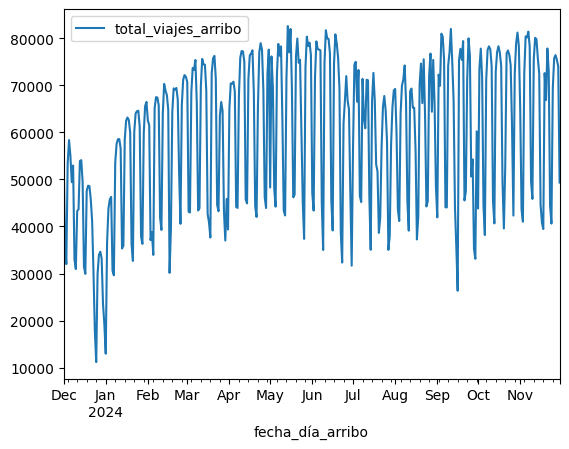

In [13]:
df_diario=aux.groupby('fecha_día_arribo')['total_viajes_arribo'].sum().reset_index()
df_diario.set_index('fecha_día_arribo').plot()

In [14]:
aux.sort_values(['Ciclo_Estacion_Retiro','fecha_día_arribo'],inplace=True)

In [15]:
aux['Ciclo_Estacion_Retiro'].unique()

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '067', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '081',
       '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '094', '095', '096', '097', '098', '099',
       '100', '1000', '1002', '102', '103', '104', '105', '106',
       '107-108', '109', '110', '111', '112', '113', '114', '115', '116',
       '117', '118', '119', '120', '121', '122', '123', '124', '125',
       '126', '127', 

In [16]:
aux[aux['Ciclo_Estacion_Retiro']=='4422222']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
149200,4422222,2023-12-01,99
149201,4422222,2023-12-02,67
149202,4422222,2023-12-03,66
149203,4422222,2023-12-04,76
149204,4422222,2023-12-05,15


In [17]:
aux[aux['Ciclo_Estacion_Retiro']=='442']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
148841,442,2023-12-08,4
148842,442,2023-12-09,27
148843,442,2023-12-10,29
148844,442,2023-12-11,34
148845,442,2023-12-12,30
...,...,...,...
149195,442,2024-11-26,44
149196,442,2024-11-27,46
149197,442,2024-11-28,32
149198,442,2024-11-29,35


In [18]:
aux['Ciclo_Estacion_Retiro'].value_counts()#Podemos ver que hay estaciones con muy pocos datos

Ciclo_Estacion_Retiro
709              366
001              366
002              366
708              366
004              366
                ... 
524              107
1000               6
4422222            5
1002               1
Kiosco 150177      1
Name: count, Length: 681, dtype: int64

In [19]:
aux[aux['Ciclo_Estacion_Retiro']=='1000']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
36531,1000,2023-12-03,3
36532,1000,2024-05-23,1
36533,1000,2024-05-25,1
36534,1000,2024-06-06,1
36535,1000,2024-07-23,1
36536,1000,2024-08-06,3


In [20]:
aux[aux['Ciclo_Estacion_Retiro']=='100']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
36172,100,2023-12-01,46
36173,100,2023-12-02,49
36174,100,2023-12-03,21
36175,100,2023-12-04,46
36176,100,2023-12-05,62
...,...,...,...
36526,100,2024-11-26,65
36527,100,2024-11-27,74
36528,100,2024-11-28,60
36529,100,2024-11-29,46


In [21]:
aux[aux['Ciclo_Estacion_Retiro']=='1002']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
36537,1002,2024-04-15,1


In [22]:
aux[aux['Ciclo_Estacion_Retiro']=='102']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
36538,102,2023-12-01,96
36539,102,2023-12-02,71
36540,102,2023-12-03,33
36541,102,2023-12-04,81
36542,102,2023-12-05,73
...,...,...,...
36899,102,2024-11-26,79
36900,102,2024-11-27,92
36901,102,2024-11-28,78
36902,102,2024-11-29,87


In [23]:
aux['Ciclo_Estacion_Retiro'] = aux['Ciclo_Estacion_Retiro'].replace({'4422222': '442', '442': '442'})
aux.groupby(['Ciclo_Estacion_Retiro', 'fecha_día_arribo'], as_index=False).agg({'total_viajes_arribo': 'sum'})

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
0,001,2023-12-01,271
1,001,2023-12-02,182
2,001,2023-12-03,150
3,001,2023-12-04,292
4,001,2023-12-05,288
...,...,...,...
242128,711,2024-11-27,140
242129,711,2024-11-28,149
242130,711,2024-11-29,149
242131,711,2024-11-30,67


In [24]:
aux[aux['Ciclo_Estacion_Retiro']=='442']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
148841,442,2023-12-08,4
148842,442,2023-12-09,27
148843,442,2023-12-10,29
148844,442,2023-12-11,34
148845,442,2023-12-12,30
...,...,...,...
149200,442,2023-12-01,99
149201,442,2023-12-02,67
149202,442,2023-12-03,66
149203,442,2023-12-04,76


In [25]:
aux.sort_values(['Ciclo_Estacion_Retiro','fecha_día_arribo'],inplace=True)

In [26]:
aux[aux['Ciclo_Estacion_Retiro']=='442']

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
149200,442,2023-12-01,99
149201,442,2023-12-02,67
149202,442,2023-12-03,66
149203,442,2023-12-04,76
149204,442,2023-12-05,15
...,...,...,...
149195,442,2024-11-26,44
149196,442,2024-11-27,46
149197,442,2024-11-28,32
149198,442,2024-11-29,35


In [27]:
aux = aux[~aux['Ciclo_Estacion_Retiro'].isin(['Kiosco 150177','1000','1002','711','710','705','707'])]

In [28]:
aux['Ciclo_Estacion_Retiro'].value_counts()#Comprobamos que ya no hay cicloestaciones extranias

Ciclo_Estacion_Retiro
709    366
691    366
689    366
688    366
686    366
      ... 
675    158
529    150
530    150
511    130
524    107
Name: count, Length: 673, dtype: int64

In [29]:
aux['Ciclo_Estacion_Retiro'].unique()

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '067', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '081',
       '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '094', '095', '096', '097', '098', '099',
       '100', '102', '103', '104', '105', '106', '107-108', '109', '110',
       '111', '112', '113', '114', '115', '116', '117', '118', '119',
       '120', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '1

In [30]:
len(aux['Ciclo_Estacion_Retiro'].unique())*366#Podemos ver que hay registros que faltan (Es anio bisiesto)

246318

In [31]:
aux

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
0,001,2023-12-01,271
1,001,2023-12-02,182
2,001,2023-12-03,150
3,001,2023-12-04,292
4,001,2023-12-05,288
...,...,...,...
241854,709,2024-11-26,49
241855,709,2024-11-27,61
241856,709,2024-11-28,53
241857,709,2024-11-29,59


In [32]:
Range = pd.date_range(start='2023-12-01', end='2024-11-30', freq='D')#Rango de fechas de los datos

In [33]:
aux.set_index(['Ciclo_Estacion_Retiro', 'fecha_día_arribo'], inplace=True)
ids = aux.index.get_level_values('Ciclo_Estacion_Retiro').unique()


In [34]:
index = pd.MultiIndex.from_product([ids, Range], names=['Ciclo_Estacion_Retiro', 'fecha_día_arribo'])
aux = aux.reindex(index)#Creamos el nuevo indice 


In [35]:
aux

total_viajes_arribo
Ciclo_Estacion_Retiro fecha_día_arribo                     
001                   2023-12-01                   271.0000
                      2023-12-02                   182.0000
                      2023-12-03                   150.0000
                      2023-12-04                   292.0000
                      2023-12-05                   288.0000
...                                                     ...
709                   2024-11-26                    49.0000
                      2024-11-27                    61.0000
                      2024-11-28                    53.0000
                      2024-11-29                    59.0000
                      2024-11-30                    50.0000

[246318 rows x 1 columns]

In [36]:
aux.reset_index(inplace=True)

In [37]:
aux

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
0,001,2023-12-01,271.0000
1,001,2023-12-02,182.0000
2,001,2023-12-03,150.0000
3,001,2023-12-04,292.0000
4,001,2023-12-05,288.0000
...,...,...,...
246313,709,2024-11-26,49.0000
246314,709,2024-11-27,61.0000
246315,709,2024-11-28,53.0000
246316,709,2024-11-29,59.0000


In [38]:
aux['total_viajes_arribo'].isnull().mean() #El porcentaje de nulos es menor al 5% por lo que podemos seguir

np.float64(0.02091605160808386)

<Axes: xlabel='fecha_día_arribo'>

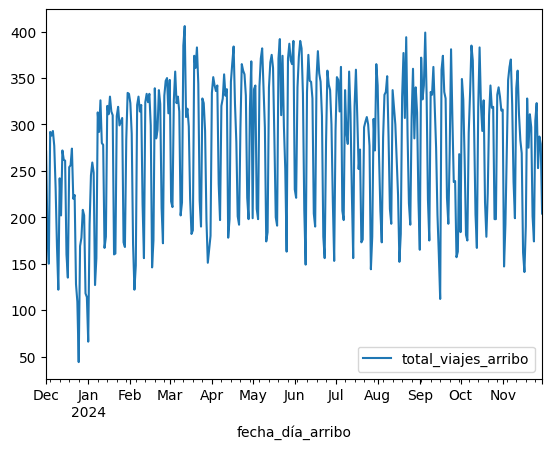

In [39]:
df_003=(aux[aux['Ciclo_Estacion_Retiro']=='001']).copy()
df_003.set_index('fecha_día_arribo').plot()

In [40]:
aux[aux['total_viajes_arribo'].isnull()]# En la estacion 711 y 710 no hay registros hasta julio, por lo que procedemos a eliminar la estacion del modelo

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
1033,003,2024-09-27,NaN
1034,003,2024-09-28,NaN
2862,008,2024-09-26,NaN
2863,008,2024-09-27,NaN
2864,008,2024-09-28,NaN
...,...,...,...
243027,699,2023-12-04,NaN
243028,699,2023-12-05,NaN
243029,699,2023-12-06,NaN
243030,699,2023-12-07,NaN


In [41]:
faltantes_por_estacion = aux.groupby('Ciclo_Estacion_Retiro')['total_viajes_arribo'].apply(lambda x: x.isna().sum())#Estaciones con mas de 5 dias de datos faltantes
estaciones_faltantes = faltantes_por_estacion[faltantes_por_estacion >= 0]

In [42]:
estaciones_faltantes

Ciclo_Estacion_Retiro
001    0
002    0
003    2
004    0
005    0
      ..
703    0
704    0
706    0
708    0
709    0
Name: total_viajes_arribo, Length: 673, dtype: int64

In [43]:
conteo_por_estacion = aux.groupby('Ciclo_Estacion_Retiro')['total_viajes_arribo'].count()
promedio = conteo_por_estacion.mean()

In [44]:
promedio

np.float64(358.34472511144133)

In [45]:
aux_fil = aux.copy()
ciloestaciones = aux_fil['Ciclo_Estacion_Retiro'].unique()

In [46]:
for estacion in ciloestaciones:
    data_est = aux_fil[aux_fil['Ciclo_Estacion_Retiro']==estacion]
    aux_nan = data_est['total_viajes_arribo'].isna()
    aux_conteo = aux_nan.groupby((~aux_nan).cumsum()).cumsum()
    if aux_conteo.max() > 6:
        aux_fil = aux_fil[aux_fil['Ciclo_Estacion_Retiro'] != estacion]


In [47]:
aux_fil

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
0,001,2023-12-01,271.0000
1,001,2023-12-02,182.0000
2,001,2023-12-03,150.0000
3,001,2023-12-04,292.0000
4,001,2023-12-05,288.0000
...,...,...,...
246313,709,2024-11-26,49.0000
246314,709,2024-11-27,61.0000
246315,709,2024-11-28,53.0000
246316,709,2024-11-29,59.0000


In [48]:
aux_fil[aux_fil['total_viajes_arribo'].isnull()]

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo
1033,003,2024-09-27,NaN
1034,003,2024-09-28,NaN
2862,008,2024-09-26,NaN
2863,008,2024-09-27,NaN
2864,008,2024-09-28,NaN
...,...,...,...
242660,698,2023-12-03,NaN
242661,698,2023-12-04,NaN
242662,698,2023-12-05,NaN
242663,698,2023-12-06,NaN


In [49]:
aux_fil.sort_values(['Ciclo_Estacion_Retiro','fecha_día_arribo'], inplace=True)
df_interpolado = aux_fil.groupby('Ciclo_Estacion_Retiro')['total_viajes_arribo'].apply(lambda x: x.interpolate(method='linear'))
aux_fil['total_viajes_interpolados'] = df_interpolado.reset_index(level=0, drop=True)

In [50]:
aux_fil['total_viajes_interpolados'].isnull().sum()

np.int64(48)

In [51]:
aux_fil[aux_fil['total_viajes_interpolados'].isnull()]


,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo,total_viajes_interpolados
143106,422,2023-12-01,NaN,NaN
143107,422,2023-12-02,NaN,NaN
143108,422,2023-12-03,NaN,NaN
143109,422,2023-12-04,NaN,NaN
143110,422,2023-12-05,NaN,NaN
143111,422,2023-12-06,NaN,NaN
192516,561,2023-12-01,NaN,NaN
192517,561,2023-12-02,NaN,NaN
192518,561,2023-12-03,NaN,NaN
192519,561,2023-12-04,NaN,NaN


In [52]:
aux_fil=aux_fil[~aux_fil['total_viajes_interpolados'].isnull()]
aux_fil.reset_index(drop=True, inplace=True)

In [53]:
aux_fil

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_arribo,total_viajes_interpolados
0,001,2023-12-01,271.0000,271.0000
1,001,2023-12-02,182.0000,182.0000
2,001,2023-12-03,150.0000,150.0000
3,001,2023-12-04,292.0000,292.0000
4,001,2023-12-05,288.0000,288.0000
...,...,...,...,...
210397,709,2024-11-26,49.0000,49.0000
210398,709,2024-11-27,61.0000,61.0000
210399,709,2024-11-28,53.0000,53.0000
210400,709,2024-11-29,59.0000,59.0000


In [54]:
aux_fil['total_viajes_arribo']=aux_fil['total_viajes_interpolados']
aux_fil.drop('total_viajes_arribo', axis=1, inplace=True)

/tmp/ipykernel_75536/1409964328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fil['total_viajes_arribo']=aux_fil['total_viajes_interpolados']
/tmp/ipykernel_75536/1409964328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fil.drop('total_viajes_arribo', axis=1, inplace=True)


Text(0, 0.5, 'Frecuencia')

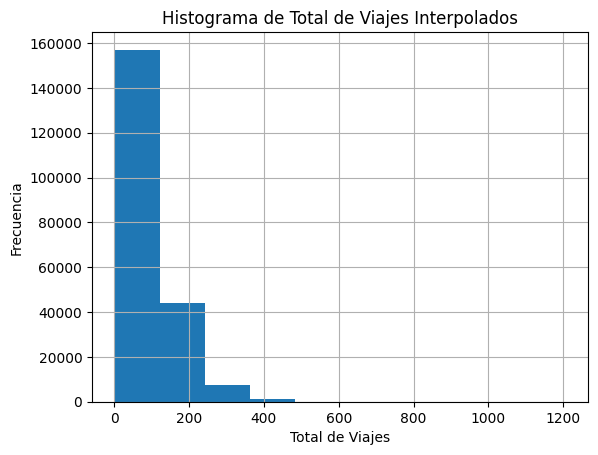

In [55]:
aux_fil['total_viajes_interpolados'].hist()
plt.title('Histograma de Total de Viajes Interpolados')
plt.xlabel('Total de Viajes')
plt.ylabel('Frecuencia')

In [56]:
aux_fil = aux_fil[aux_fil['total_viajes_interpolados'] <= 550]

Text(0, 0.5, 'Frecuencia')

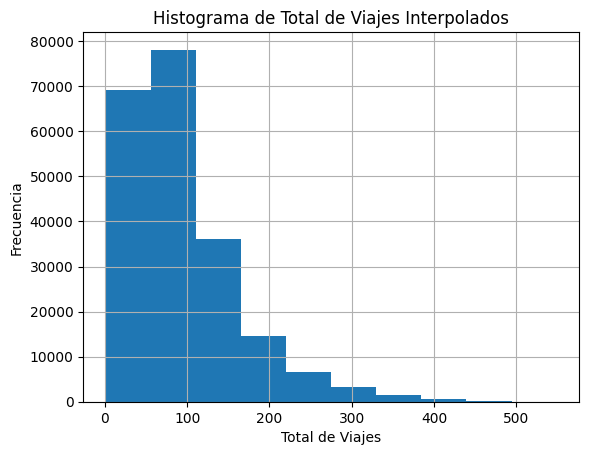

In [57]:
aux_fil['total_viajes_interpolados'].hist()
plt.title('Histograma de Total de Viajes Interpolados')
plt.xlabel('Total de Viajes')
plt.ylabel('Frecuencia')

In [58]:
for i in range(1, 8):  # Para los 7 últimos días
    aux_fil.loc[:, f't-{i}'] = aux_fil.groupby('Ciclo_Estacion_Retiro')['total_viajes_interpolados'].shift(i)

/tmp/ipykernel_75536/2661234563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fil.loc[:, f't-{i}'] = aux_fil.groupby('Ciclo_Estacion_Retiro')['total_viajes_interpolados'].shift(i)
/tmp/ipykernel_75536/2661234563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fil.loc[:, f't-{i}'] = aux_fil.groupby('Ciclo_Estacion_Retiro')['total_viajes_interpolados'].shift(i)
/tmp/ipykernel_75536/2661234563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [59]:
aux_fil

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_interpolados,t-1,t-2,t-3,t-4,t-5,t-6,t-7
0,001,2023-12-01,271.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001,2023-12-02,182.0000,271.0000,NaN,NaN,NaN,NaN,NaN,NaN
2,001,2023-12-03,150.0000,182.0000,271.0000,NaN,NaN,NaN,NaN,NaN
3,001,2023-12-04,292.0000,150.0000,182.0000,271.0000,NaN,NaN,NaN,NaN
4,001,2023-12-05,288.0000,292.0000,150.0000,182.0000,271.0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
210397,709,2024-11-26,49.0000,57.0000,44.0000,41.0000,44.0000,63.0000,49.0000,64.0000
210398,709,2024-11-27,61.0000,49.0000,57.0000,44.0000,41.0000,44.0000,63.0000,49.0000
210399,709,2024-11-28,53.0000,61.0000,49.0000,57.0000,44.0000,41.0000,44.0000,63.0000
210400,709,2024-11-29,59.0000,53.0000,61.0000,49.0000,57.0000,44.0000,41.0000,44.0000


In [60]:
aux_fil.dropna(how='any', inplace=True)


/tmp/ipykernel_75536/934091043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_fil.dropna(how='any', inplace=True)


In [61]:
aux_fil

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_interpolados,t-1,t-2,t-3,t-4,t-5,t-6,t-7
7,001,2023-12-08,232.0000,277.0000,293.0000,288.0000,292.0000,150.0000,182.0000,271.0000
8,001,2023-12-09,169.0000,232.0000,277.0000,293.0000,288.0000,292.0000,150.0000,182.0000
9,001,2023-12-10,122.0000,169.0000,232.0000,277.0000,293.0000,288.0000,292.0000,150.0000
10,001,2023-12-11,242.0000,122.0000,169.0000,232.0000,277.0000,293.0000,288.0000,292.0000
11,001,2023-12-12,202.0000,242.0000,122.0000,169.0000,232.0000,277.0000,293.0000,288.0000
...,...,...,...,...,...,...,...,...,...,...
210397,709,2024-11-26,49.0000,57.0000,44.0000,41.0000,44.0000,63.0000,49.0000,64.0000
210398,709,2024-11-27,61.0000,49.0000,57.0000,44.0000,41.0000,44.0000,63.0000,49.0000
210399,709,2024-11-28,53.0000,61.0000,49.0000,57.0000,44.0000,41.0000,44.0000,63.0000
210400,709,2024-11-29,59.0000,53.0000,61.0000,49.0000,57.0000,44.0000,41.0000,44.0000


In [62]:
aux_fil[aux_fil['total_viajes_interpolados'].isnull()]

,Ciclo_Estacion_Retiro,fecha_día_arribo,total_viajes_interpolados,t-1,t-2,t-3,t-4,t-5,t-6,t-7


In [63]:
X=aux_fil[['t-1', 't-2','t-3', 't-4', 't-5', 't-6', 't-7']]
y=aux_fil['total_viajes_interpolados']
model=LinearRegression()

In [64]:
model.fit(X,y)

LinearRegression()

In [65]:
model.score(X, y)

0.8717169856197009

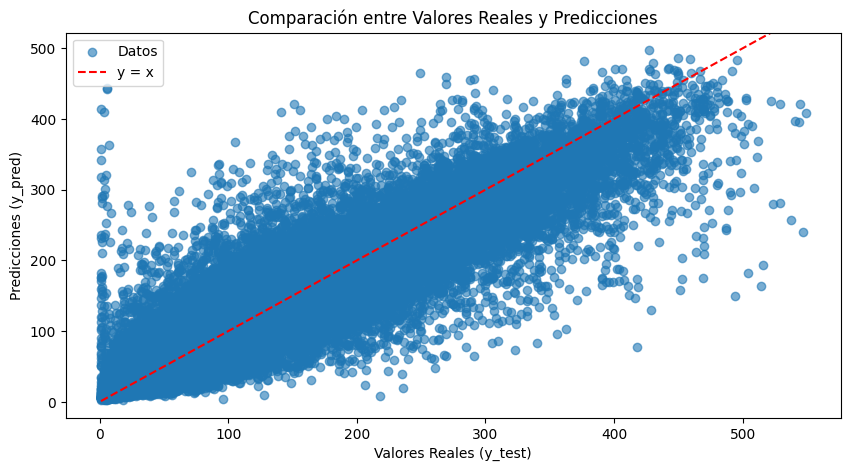

In [66]:
plt.figure(figsize=(10, 5))

# Gráfico de dispersión con los valores reales (X) y predichos (Y)

plt.scatter(y, model.predict(X), label='Datos', alpha=0.6)

# Agregar la recta y=x para referencia

plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='y = x')

# Etiquetas y título

plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Comparación entre Valores Reales y Predicciones')

# Añadir un pequeño margen al rango de los ejes
x_margin = 0.05 * (max(y) - min(y))
y_margin = 0.05 * (max(model.predict(X)) - min(model.predict(X)))

# Ajuste de los límites de los ejes con márgenes
plt.xlim([min(y) - x_margin, max(y) + x_margin])
plt.ylim([min(model.predict(X)) - y_margin, max(model.predict(X)) + y_margin])


# Leyenda
plt.legend()


# Mostrar el gráfico
plt.show()